In [50]:
# !pip install investpy
# !pip install fuzzy-c-means
# !pip install optuna


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fcmeans
import investpy
import optuna
import datetime

In [5]:
# Amount of cryptocurrencies to analyze
amount_of_cryptos = 10

# period of analysis
days = 10

cryptos_list = investpy.crypto.get_cryptos_list() 
cryptos = cryptos_list[:amount_of_cryptos]

end_day = datetime.date.today().strftime('%d/%m/%Y') # format, approvable by investpy
start_day = datetime.date.today() - datetime.timedelta(days=days)
start_day = start_day.strftime('%d/%m/%Y')

data = pd.DataFrame()

for i in range(amount_of_cryptos):
    curdata = investpy.crypto.get_crypto_historical_data(
        crypto=cryptos[i],
        from_date=start_day,
        to_date=end_day
    )
    curdata['Open'] = curdata['Open'].pct_change() # chain rate of increase
    curdata['Volume'] = curdata['Volume'].pct_change()
    data[f'{cryptos_list[i]} Price'] = curdata['Open'].clip(-3, 3)
    data[f'{cryptos_list[i]} Price'].fillna(curdata['Open'].mean(), inplace=True)
    data[f'{cryptos_list[i]} Volume'] = curdata['Volume'].clip(-3, 3)
    data[f'{cryptos_list[i]} Volume'].fillna(curdata['Volume'].mean(), inplace=True)
data = data.drop(data.index[0], axis=0)
data

,Bitcoin Price,Bitcoin Volume,Ethereum Price,Ethereum Volume,Binance Coin Price,Binance Coin Volume,Tether Price,Tether Volume,Cardano Price,Cardano Volume,Polkadot Price,Polkadot Volume,XRP Price,XRP Volume,Uniswap Price,Uniswap Volume,Litecoin Price,Litecoin Volume,Chainlink Price,Chainlink Volume
Date,,,,,,,,,,,,,,,,,,,,
2021-03-29,-0.001651,0.838057,-0.015185,0.487745,-0.001634,-0.169736,-0.0006,0.839697,0.011041,0.016832,-0.011100,0.765178,-0.004253,0.572442,-0.013045,0.386598,0.000826,0.057282,-0.007076,0.574480
2021-03-30,0.033173,-0.201094,0.077089,0.560580,0.023245,0.989923,0.0004,-0.097487,0.010893,-0.009866,0.065028,-0.493864,0.036311,0.077610,0.040853,-0.087487,0.051625,-0.069622,0.051763,-0.344626
2021-03-31,0.020078,0.137554,0.013259,-0.144731,0.131906,-0.142290,0.0006,0.366228,0.008430,0.173624,-0.010204,1.512361,-0.005519,0.292764,-0.016198,0.057594,0.010519,0.094428,-0.007133,0.969744
2021-04-01,-0.000140,-0.295929,0.042265,-0.198131,-0.029607,-0.068760,-0.0005,-0.135259,-0.017562,-0.211570,0.090329,-0.220337,0.013019,-0.027175,-0.014536,0.197967,0.004551,0.054372,0.054957,0.221790
2021-04-02,-0.000766,0.048230,0.025693,0.186357,0.106357,-0.035756,-0.0005,-0.118970,-0.007263,0.173917,0.010092,-0.275758,0.001738,0.126103,0.019706,-0.306521,0.028830,-0.995330,0.023834,-0.222485
2021-04-03,0.004404,-0.050184,0.084619,-0.186090,0.013430,-0.260140,-0.0002,-0.385078,0.006298,0.230958,0.095285,0.978831,0.063446,0.250436,0.054777,0.897398,0.045952,3.000000,0.079481,0.199314
2021-04-04,-0.032506,-0.167729,-0.059419,-0.209538,-0.049909,-0.117845,0.0000,-0.246346,-0.022656,-0.303360,0.008634,-0.606665,-0.045982,-0.372361,-0.036864,-0.595086,-0.077632,-0.095348,-0.097043,-0.416144
2021-04-05,0.020025,-0.053870,0.034027,0.454379,0.085272,0.263642,0.0008,1.171845,0.016083,0.307202,0.071756,0.264797,0.096794,3.000000,0.063169,0.143736,0.036223,0.121097,0.049471,0.548332
2021-04-06,0.016609,0.425309,0.015736,-0.162382,0.051666,0.277812,-0.0003,0.390708,0.025098,1.294951,0.032820,-0.089065,0.438564,0.232829,-0.005542,0.285899,0.094859,0.064561,0.051040,0.889648


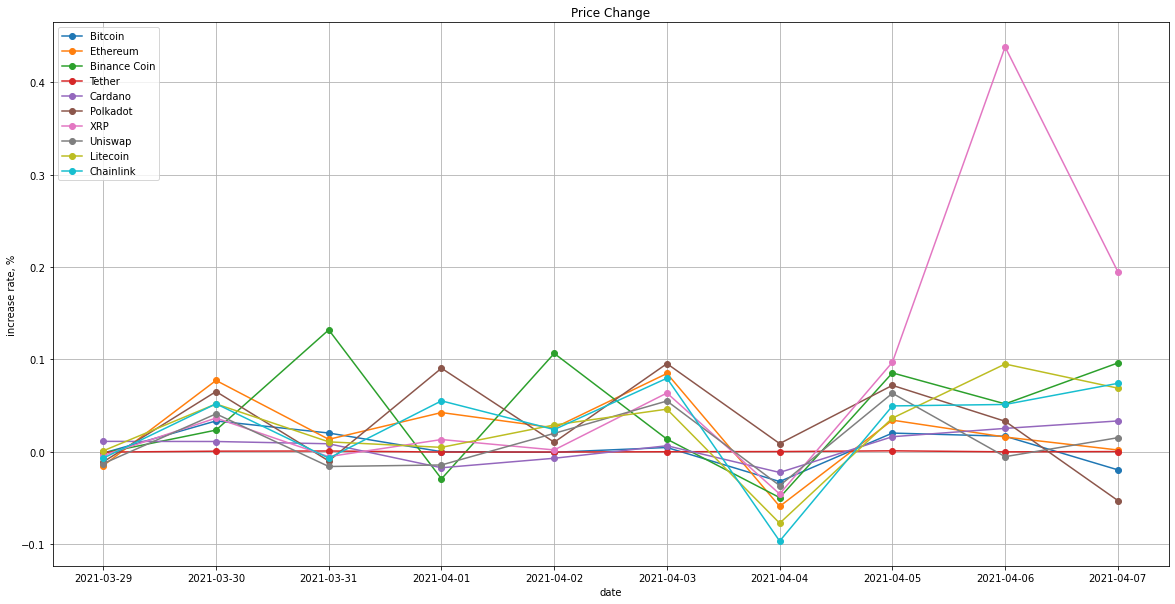

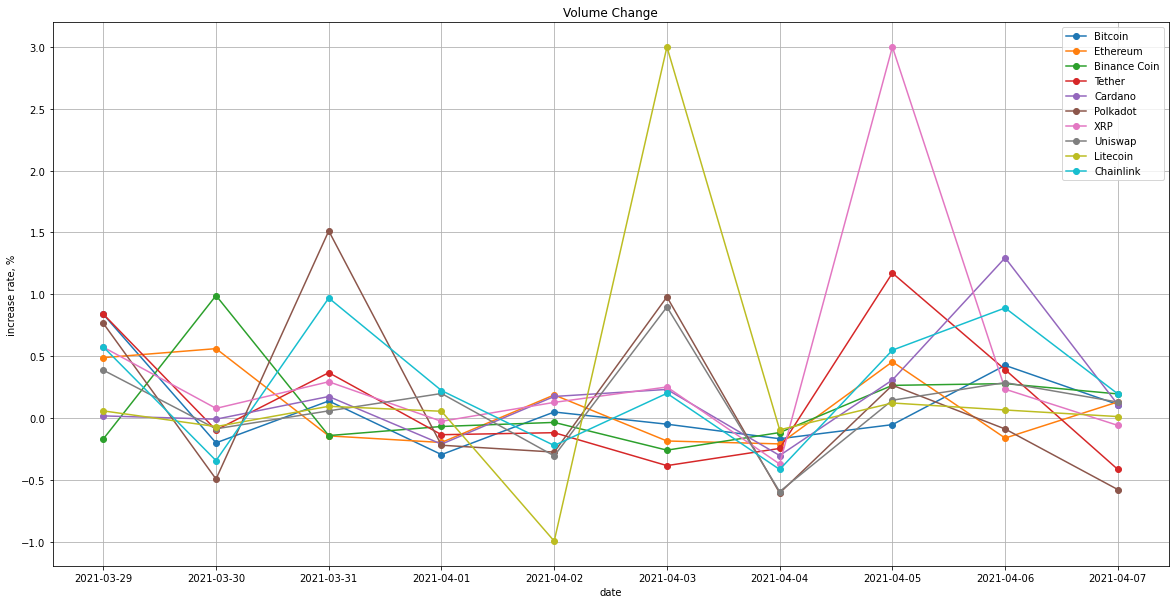

In [7]:
plt.figure(figsize=(20,10))
for i in range(len(cryptos)):
    plt.plot(data.index, data[f'{cryptos[i]} Price'], marker='o')
plt.title('Price Change')
plt.legend(cryptos, loc=0)
plt.grid()

plt.xlabel("date")
plt.ylabel('increase rate, %')
plt.show()

plt.figure(figsize=(20,10))
for i in range(len(cryptos)):
    plt.plot(data.index, data[f'{cryptos[i]} Volume'], marker='o')
plt.legend(cryptos, loc=0)
plt.title('Volume Change')
plt.grid()

plt.xlabel("date")
plt.ylabel('increase rate, %')
plt.show()

In [40]:
def FCSETS(partition):
    Full_u = {}

    for i in range(days):
        x = []
        y = [] 
        df = pd.DataFrame()
        for j in range(amount_of_cryptos): 
            x.append(np.round(data[f'{cryptos_list[j]} Price'].iloc[i], 5))
            y.append(np.round(data[f'{cryptos_list[j]} Volume'].iloc[i], 5))
        df['x'] = x
        df['x'].fillna(df['x'].mean(), inplace=True)
        df['y'] = y
        df['y'].fillna(df['y'].mean(), inplace=True)
        merged = df[['x','y']]
        merged = merged.to_numpy()
        

        fcm = fcmeans.FCM(n_clusters=partition[i])
        fcm.fit(merged)
        fcm.u = np.around(fcm.u, 3)
        Full_u[i] = fcm.u

    def to_eu(day, ts): #ts == crypto
        Eu_matrix = []
        for i in range(amount_of_cryptos):
            Eu_matrix.append(1 - (1/2)*np.sum(np.abs(np.array(day[ts])-np.array(day[i]))))
            Eu_matrix[i] = round(Eu_matrix[i], 6)
        return Eu_matrix
        
    def Stability(U, ts):
        for i in U:
            U[i] = to_eu(U[i], ts)
        stab = 0
        for i in range(0, days-1):
            for r in range(i+1, days):
                for s in range(amount_of_cryptos):
                    stab += np.sum(U[i])**amount_of_cryptos*(np.abs(U[r][s]-U[i][s]))**2/(np.sum(U[i])**amount_of_cryptos)
        return 1 - stab*2/(days*(days-1))

    stabilities = []
    for i in range(amount_of_cryptos):
        stabilities.append(Stability(Full_u, i))
    
    result = np.mean(stabilities)
    return result

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


0.7087583926054423

In [51]:
# trying to maximize stability

def objective(trial):
    partition = [trial.suggest_int(f'day_{i}', 2, 5, 1) for i in range(days)]
    return FCSETS(partition)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

, 3, 5, 4, 5]
[I 2021-04-07 13:51:41,797] Trial 35 finished with value: 0.7087216386043844 and parameters: {'day_0': 5, 'day_1': 4, 'day_2': 4, 'day_3': 5, 'day_4': 5, 'day_5': 4, 'day_6': 3, 'day_7': 5, 'day_8': 4, 'day_9': 5}. Best is trial 30 with value: 0.7289306357009642.
[5, 3, 4, 5, 4, 4, 2, 5, 5, 5]
[I 2021-04-07 13:51:43,256] Trial 36 finished with value: 0.7180423089448669 and parameters: {'day_0': 5, 'day_1': 3, 'day_2': 4, 'day_3': 5, 'day_4': 4, 'day_5': 4, 'day_6': 2, 'day_7': 5, 'day_8': 5, 'day_9': 5}. Best is trial 30 with value: 0.7289306357009642.
[5, 4, 4, 5, 5, 4, 3, 5, 5, 5]
[I 2021-04-07 13:51:44,735] Trial 37 finished with value: 0.7289306357009642 and parameters: {'day_0': 5, 'day_1': 4, 'day_2': 4, 'day_3': 5, 'day_4': 5, 'day_5': 4, 'day_6': 3, 'day_7': 5, 'day_8': 5, 'day_9': 5}. Best is trial 30 with value: 0.7289306357009642.
[5, 3, 4, 5, 4, 3, 3, 5, 4, 5]
[I 2021-04-07 13:51:46,148] Trial 38 finished with value: 0.6611789389886067 and parameters: {'day_0'